In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
medical_df=pd.read_csv(r"C:/Users/User-PC/Healthcare Insurance Analysis/Data Source/insurance.csv")

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Exploring Data 

In [5]:
medical_df.shape

(1338, 7)

In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Data Visualization

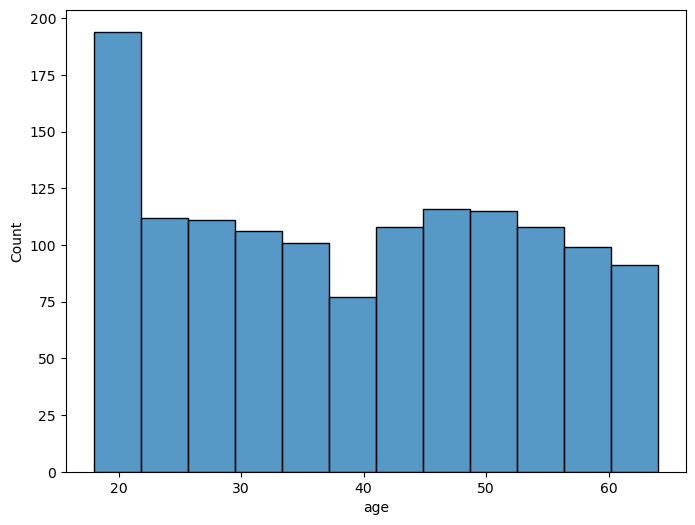

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(medical_df['age'])
plt.show()

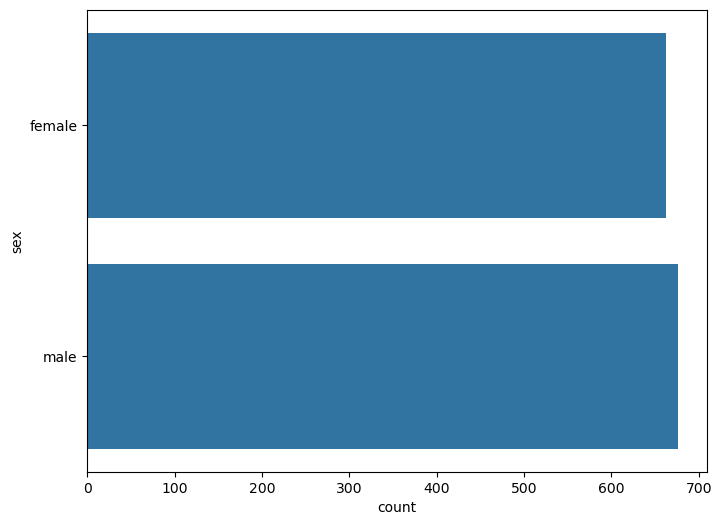

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(medical_df['sex'])
plt.show()

In [12]:
medical_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

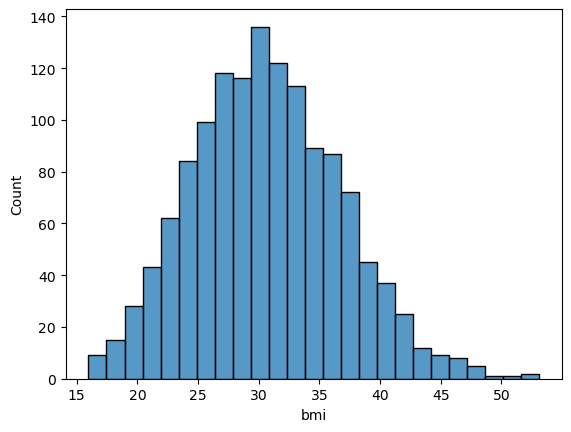

In [13]:
sns.histplot(medical_df['bmi'])

In [14]:
medical_df['bmi'].value_counts().head(5)

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
Name: count, dtype: int64

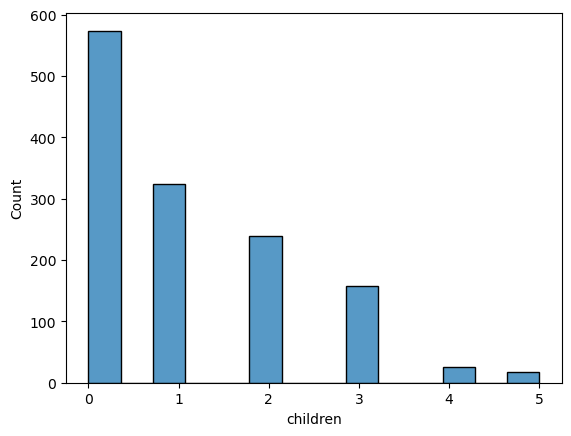

In [15]:
sns.histplot(medical_df['children'])
plt.show()

In [16]:
medical_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

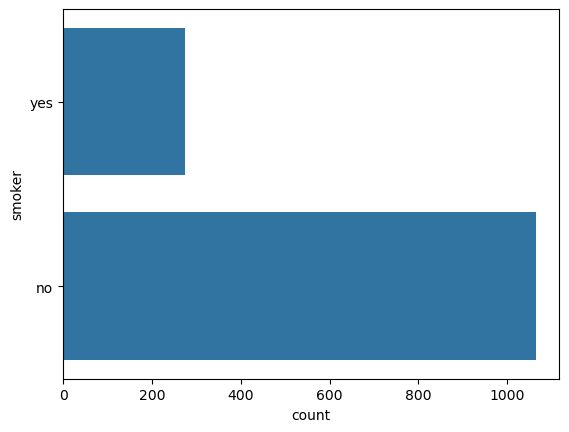

In [17]:
sns.countplot(medical_df['smoker'])
plt.show()

In [18]:
medical_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [19]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Data Pre-processing

In [20]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
sex_mapping={'female':0,'male':1}
medical_df['sex']=medical_df['sex'].map(sex_mapping)

smoker_mapping={'yes':1,'no':0}
medical_df['smoker']=medical_df['smoker'].map(smoker_mapping)

region_mapping={'southwest':1,'southeast':0, 'northwest':2,'northeast':3}
medical_df['region']=medical_df['region'].map(region_mapping)

In [22]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


Train Test Split

In [23]:
x=medical_df.drop('charges',axis=1)
y=medical_df['charges']

In [24]:
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [25]:
x_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,2
1285,47,0,24.320,0,0,3
1142,52,0,24.860,0,0,0
969,39,0,34.320,5,0,0
486,54,0,21.470,3,0,2
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,3
1130,39,0,23.870,5,0,0
1294,58,1,25.175,0,0,3
860,37,0,47.600,2,1,1


In [26]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

Prediction System

In [27]:
lg=LinearRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

In [28]:
r2=r2_score(y_pred,y_test)
print(r2)

error=mean_absolute_error(y_test,y_pred)
print(error)

0.7085208573029398
4174.04787648647


In [29]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [33]:
input_df=(18,1,33.770,1,0,0)
np_df=np.array(input_df)
input_df_reshaped=np_df.reshape(1,-1)
predicted=lg.predict(input_df_reshaped)

C:\Users\User-PC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
predicted

array([3677.42704387])